In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [5]:
def filter_std(s, factor = 3):
    std = s.std()
    for i,num in enumerate(s):
        if abs(num)>std*factor:
            s[i]=np.nan
    return s

In [101]:
def inv_cumprod(series_ch, s0):
    series_ch+=1
    series_ch[0]=s0
    return series_ch.cumprod()

In [102]:
series = pd.read_csv('data_clean.csv')['Series 1']

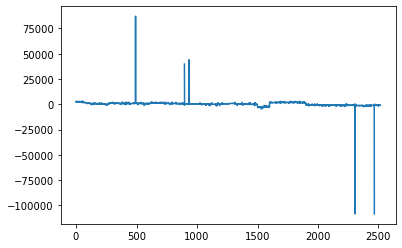

In [103]:
plt.plot(series)

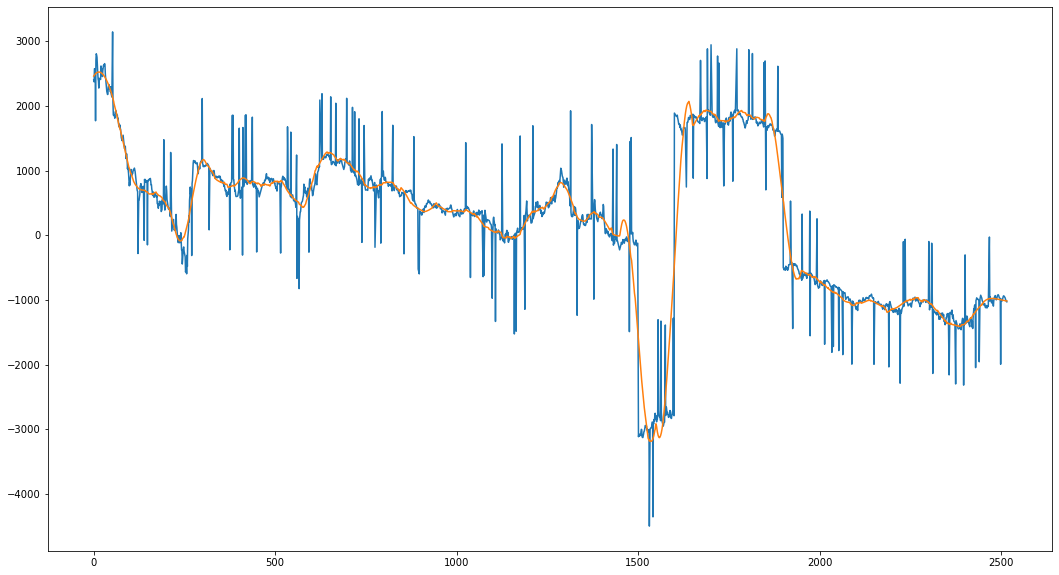

In [104]:
series = pd.read_csv('data_clean.csv')['Series 1']
dfs = series.diff()
series = filter_std(series, factor = 3).interpolate()
plt.figure(figsize=(18,10))
plt.plot(series)

window_size, poly_order = 101, 3
yy_sg = savgol_filter(series.values, window_size, poly_order)
plt.plot(pd.Series(yy_sg))
pd.Series(yy_sg, name='Series 1').to_csv('qcap_data_cleaning.csv', index = False)